In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.optimizers import Adam
import warnings

In [15]:
warnings.filterwarnings('ignore')
train = pd.read_csv(r'D:\Python\Kagle\train.csv')

In [16]:
remover = train.columns[(train.isna().sum()/train.shape[0]) > 0.1]
train = train.drop(remover, axis=1)
colunas_objeto = train.select_dtypes(include='object')
colunas_mais_de_9_valores = colunas_objeto.columns[colunas_objeto.nunique() > 9]
train = train.drop(colunas_mais_de_9_valores, axis=1)
train = train.fillna(method='ffill')

train_columns = list(train.drop('SalePrice',axis=1).columns)
#train.select_dtypes(include='object').nunique().sort_values(ascending=False)

In [17]:
objeto = train.select_dtypes(include='object')
num = train.drop('SalePrice',axis=1).select_dtypes(exclude='object')

objeto = objeto.fillna(method='ffill')
num = num.fillna(method='ffill')

In [18]:
onehot = OneHotEncoder(sparse=False)
minmax = MinMaxScaler()

In [19]:
X_minmax = minmax.fit_transform(num)
X_onehot = onehot.fit_transform(objeto)
X = np.append(X_minmax, X_onehot, axis=1)
y = train['SalePrice']

print(X.shape)
print(y.shape)

(1460, 214)
(1460,)


In [42]:
model = Sequential()
optimizer = Adam(learning_rate=0.001)
units = int(X.shape[1] * 1.5)

model.add(Dense(units=units, activation='relu', input_dim=X.shape[1]))
#model.add(Dropout(0.2)) 
model.add(Dense(units=units, activation='relu', kernel_regularizer=l2(0.01)))
#model.add(Dropout(0.2)) 
model.add(Dense(units=units, activation='relu', kernel_regularizer=l2(0.01)))

model.add(Dense(units=1, activation='linear'))

model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
resultado = model.fit(X, y, batch_size=10, epochs=200, verbose=False)

46/46 [==============================] - 0s 1ms/step


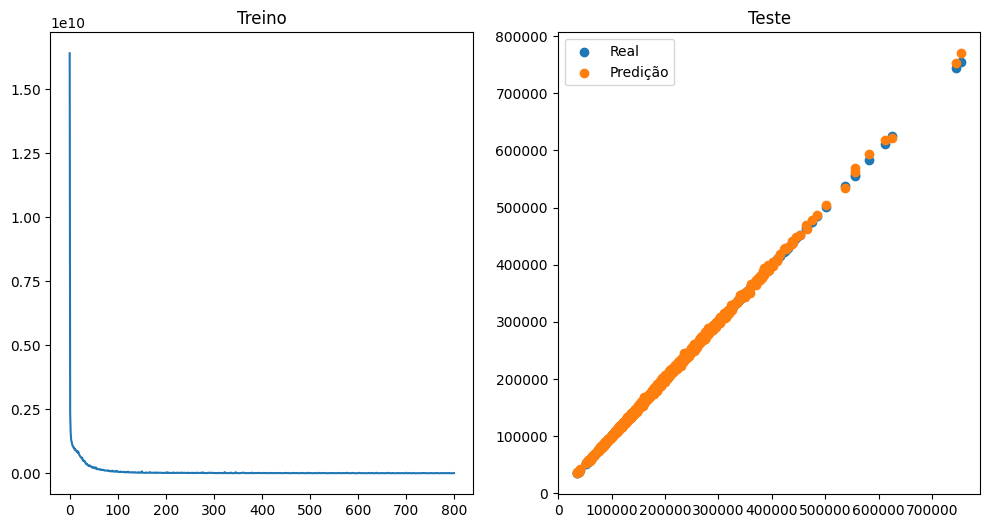

RSME = 2174.0


In [33]:
predict = model.predict(X)

RSME = np.round(np.sqrt(mean_squared_error(y,predict)))

plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
plt.plot(resultado.history['loss'])
plt.title('Treino')

plt.subplot(1,2,2)
plt.scatter(y,y)
plt.scatter(y,predict)
plt.legend(['Real', 'Predição'])
plt.title('Teste')
plt.show()

print(f'RSME = {RSME}')

In [43]:
teste = pd.read_csv(r'D:\Python\Kagle\test.csv')

df_teste = pd.DataFrame(teste)

df_teste = df_teste[train_columns]

objeto_teste = df_teste.select_dtypes(include='object')
num_teste = df_teste.select_dtypes(exclude='object')

objeto_teste = objeto_teste.fillna(method='ffill')
num_teste = num_teste.fillna(method='ffill')

X_minmax = minmax.transform(num_teste)
X_onehot = onehot.transform(objeto_teste)
X_teste = np.append(X_minmax, X_onehot, axis=1)

Predict_teste = model.predict(X_teste)

46/46 [==============================] - 0s 1ms/step


In [12]:
df_teste['SalePrice'] = Predict_teste

kagle = df_teste[['Id', 'SalePrice']]
kagle.to_csv(r'D:\Python\Git_Github\Repositorios\Kagle\Kagle\kagle_house_v12.csv',index=False)